In [5]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import MySQLdb
import matplotlib.pyplot as plt
import seaborn as sns
import time
import seaborn as sns
import matplotlib.pyplot as plt
start_time = time.time()
%matplotlib inline



# Lendo Banco de dados e consultando operações da Área Rural

In [6]:
# Lendo o banco de dados
con = MySQLdb.connect(   host = "localhost",
                        user = "xxx",
                        passwd = "xxx",
                        db = "Dataset")

df = pd.read_sql('SELECT * FROM Dataset where area = 1', con)
df.fillna({'Objetivo_da_Operacao':0, 'Aplicacao_de_Recursos':0, 'Agricultura_Familiar':0, 'Tipo_de_Assistencia_Tecnica':0, 'Amparo_da_Operacao':0, 'Grupo_do_Cliente':0, 'Total_do_FNE_Risco':0, 'Tipo_de_Tratamento':0, 'Forma_de_Credito':0, 'Incidencia_de_IOF':0, 'Custo_Efetivo_Total':0, 'Atividade':0, 'Finalidade_do_Financiamento':0, 'Categoria_do_Produtor':0, 'Tipo_de_Recurso':0, 'Tipo_Lei':0, 'Operacao_Consignacao':0}, inplace = True)

## Fazendo correlação para seleção de variáveis

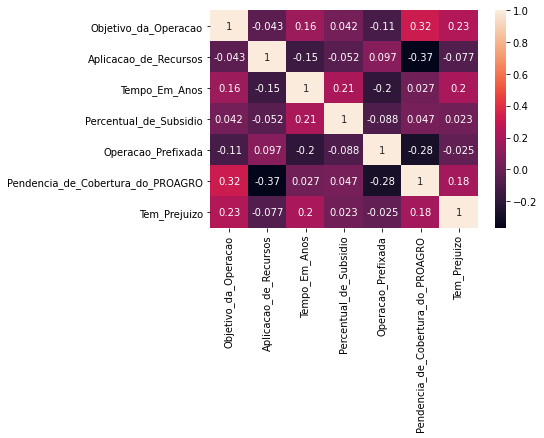

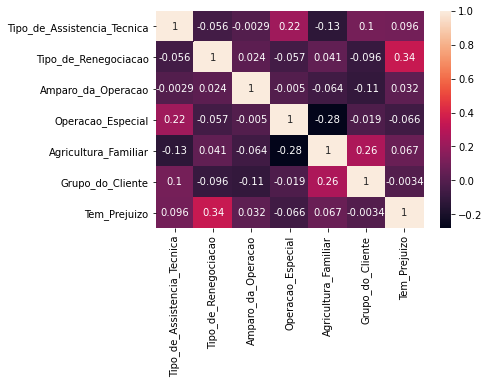

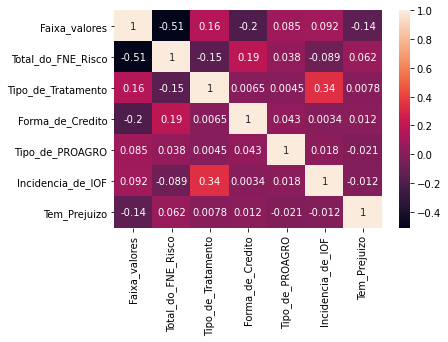

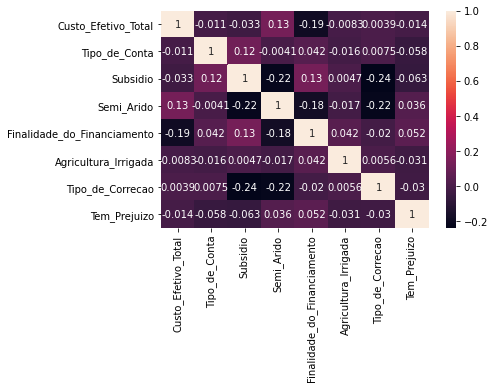

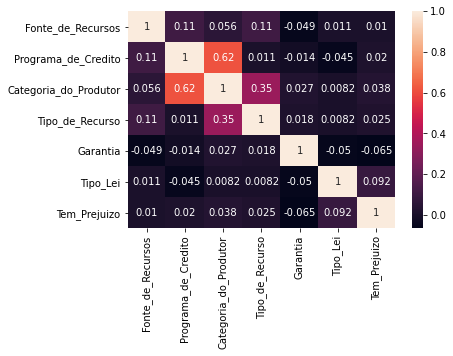

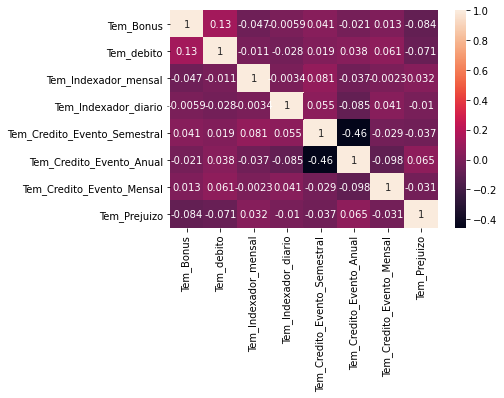

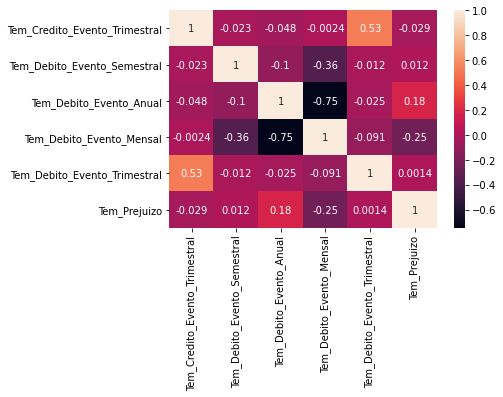

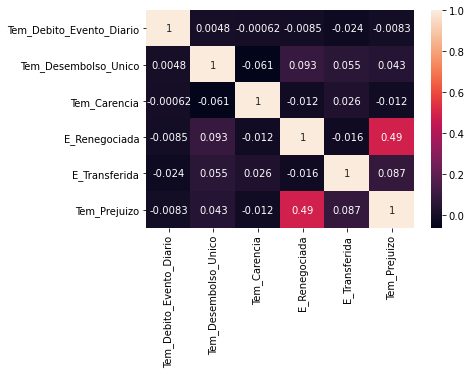

In [7]:
df1 = df[['Objetivo_da_Operacao', 'Aplicacao_de_Recursos', 'Tempo_Em_Anos', 
          'Percentual_de_Subsidio', 'Operacao_Prefixada', 'Pendencia_de_Cobertura_do_PROAGRO', 
         'Tem_Prejuizo']]
                  
df2 = df[['Tipo_de_Assistencia_Tecnica', 'Tipo_de_Renegociacao', 'Amparo_da_Operacao', 
          'Operacao_Especial', 'Agricultura_Familiar', 'Grupo_do_Cliente', 'Tem_Prejuizo']]

df3 = df[['Faixa_valores', 'Total_do_FNE_Risco', 'Tipo_de_Tratamento', 'Forma_de_Credito', 
          'Tipo_de_PROAGRO', 'Incidencia_de_IOF', 'Tem_Prejuizo']]
         
df4 = df[['Custo_Efetivo_Total', 'Tipo_de_Conta', 'Subsidio', 'Semi_Arido', 
          'Finalidade_do_Financiamento', 'Agricultura_Irrigada', 'Tipo_de_Correcao', 'Tem_Prejuizo']]

df5 = df[['Fonte_de_Recursos', 'Programa_de_Credito', 'Categoria_do_Produtor', 'Tipo_de_Recurso', 
          'Garantia', 'Tipo_Lei', 'Tem_Prejuizo']]
         
df6 = df[['Tem_Bonus', 'Tem_debito', 'Tem_Indexador_mensal', 'Tem_Indexador_diario', 
         'Tem_Credito_Evento_Semestral', 'Tem_Credito_Evento_Anual', 'Tem_Credito_Evento_Mensal', 
         'Tem_Prejuizo']]
         
df7 = df[['Tem_Credito_Evento_Trimestral', 'Tem_Debito_Evento_Semestral', 'Tem_Debito_Evento_Anual',
          'Tem_Debito_Evento_Mensal', 'Tem_Debito_Evento_Trimestral', 'Tem_Prejuizo']] 

df8 = df[['Tem_Debito_Evento_Diario', 
         'Tem_Desembolso_Unico', 'Tem_Carencia', 'E_Renegociada', 'E_Transferida', 'Tem_Prejuizo']]

corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = df2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = df3.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = df4.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = df5.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = df6.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = df7.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = df8.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Declarando função para remover outlier, caso necessite

In [8]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

## Seleção de variáveis mais significativas

In [9]:
dataset = df[['Objetivo_da_Operacao', 'Tempo_Em_Anos', 'Pendencia_de_Cobertura_do_PROAGRO', 'Tipo_de_Assistencia_Tecnica', 'Tipo_de_Renegociacao', 'Faixa_valores', 
        'Tipo_Lei', 'Tem_Bonus', 'Tem_Debito_Evento_Anual', 'Tem_Debito_Evento_Mensal', 'E_Renegociada', 'Tem_Prejuizo']]


In [10]:
dataset.sample(10)

,Objetivo_da_Operacao,Tempo_Em_Anos,Pendencia_de_Cobertura_do_PROAGRO,Tipo_de_Assistencia_Tecnica,Tipo_de_Renegociacao,Faixa_valores,Tipo_Lei,Tem_Bonus,Tem_Debito_Evento_Anual,Tem_Debito_Evento_Mensal,E_Renegociada,Tem_Prejuizo
2061,1.0,2.0,0.0,1.0,2.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0
1660,1.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0
340,1.0,2.0,1.0,3.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0
1131,1.0,2.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0
532,18.0,1.0,1.0,1.0,1.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0
1470,1.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0
1179,2.0,6.0,0.0,1.0,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0
1226,1.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0
322,1.0,2.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0
1398,1.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0
